In [7]:
%pip install huggingface-hub bitsandbytes accelerate datasets transformers

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install -i https://pypi.org/simple/ bitsandbytes

Looking in indexes: https://pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip uninstall transformers -y
%pip install --upgrade transformers==4.30.2

Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached transformers-4.30.2-py3-none-any.whl (7.2 MB)
  Using cached tokenizers-0.13.3-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.9.4
    Uninstalling tokenizers-0.9.4:
      Successfully uninstalled tokenizers-0.9.4
ERROR: Could not install packages due to an EnvironmentError: [Errno 16] Device or resource busy: '.nfs000000004a1ef52600001bab'

Note: you may need to restart the kernel to use updated packages.


# Energy

In [8]:
path = "/Users/oniichan/Documents/Class/Projects/TimeSeries/multivariate-time-series-data-master/solar-energy/solar_AL.txt"

In [1]:
import psutil
import os

process = psutil.Process(os.getpid())
print(psutil.virtual_memory().total / (1024**3))

503.5796928405762


In [9]:
# load into df
import pandas as pd
df = pd.read_csv(path, sep=",", header=None)
display(df.head())

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(7200720,)


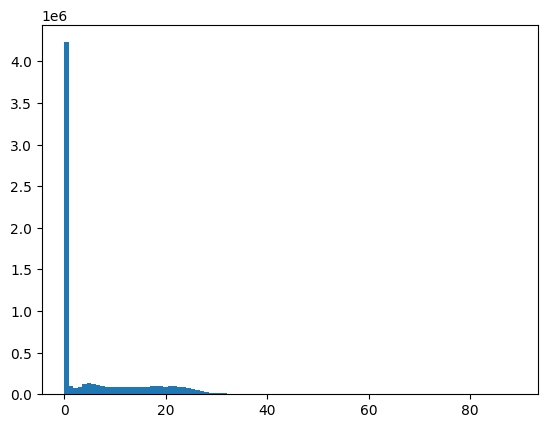

In [10]:
# flatten into 1D array
data = df.values.flatten()
print(data.shape)

# plot as histogram
import matplotlib.pyplot as plt
plt.hist(data, bins=100)
plt.show()

# Currency

In [1]:
path = "exchange_rate.txt"

In [2]:
# load into df
import pandas as pd

cols = "Australia, British, Canada, Switzerland, China, Japan, New Zealand, Singapore".split(", ")

df = pd.read_csv(path, sep=",", header=None)
df.columns = cols
display(df.head())
print(df.shape)


,Australia,British,Canada,Switzerland,China,Japan,New Zealand,Singapore
0,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.5930,0.525486
1,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.5940,0.523972
2,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.5973,0.526316
3,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.5970,0.523834
4,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.5985,0.527426


(7588, 8)


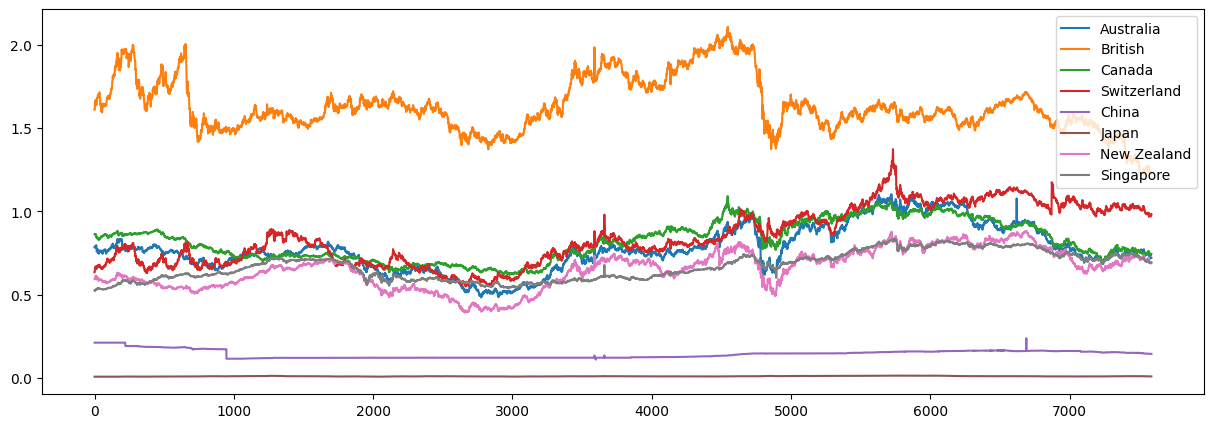

In [3]:
# plot as time series
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
for col in df.columns:
    plt.plot(df[col], label=col)
plt.legend()
plt.show()

In [4]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch
import numpy as np

# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Set padding token
tokenizer.pad_token = tokenizer.eos_token
model.resize_token_embeddings(len(tokenizer))
model.config.pad_token_id = model.config.eos_token_id

# get first col of df
# Convert to numpy array and normalize to 0-255 range
arr = df["Australia"].values
normalized = ((arr - arr.min()) * len(tokenizer.get_vocab()) / (arr.max() - arr.min()))#.astype(np.longlong)

print("Original:", arr)
# print("Encoded:", normalized.tobytes())

input_ids = torch.Tensor(normalized[:99]).long().unsqueeze(0)
print(input_ids.shape)
# print(len(tokenizer.get_vocab()))
# # Prepare input text
# text = "Replace me by any text you'd like. test lets add more text, does this make it bigger"
# input_ids = tokenizer.encode(text, return_tensors='pt')
# print(input_ids.shape)

# Generate text
output_sequences = model.generate(
    input_ids,
    max_length=100,  # Maximum length of output sequence
    num_return_sequences=1,  # Number of sequences to generate
    no_repeat_ngram_size=2,  # Prevent repetition of n-grams
    temperature=0.7,  # Controls randomness (higher = more random)
    pad_token_id=tokenizer.eos_token_id,
    eos_token_id=tokenizer.eos_token_id,
)

print(output_sequences.shape, output_sequences[0])

# Decode and print the generated text
generated_text = tokenizer.decode(output_sequences[0], skip_special_tokens=True)
print(generated_text)

/Users/oniichan/anaconda3/envs/its530_py38/lib/python3.8/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Original: [0.7855   0.7818   0.7867   ... 0.723197 0.720825 0.720825]
torch.Size([1, 99])
torch.Size([1, 100]) tensor([24526, 24226, 24623, 24567, 24477, 24615, 24778, 24972, 25208, 24843,
        25029, 25224, 25175, 25330, 23682, 22635, 22319, 22497, 22741, 22943,
        23146, 23284, 23552, 22903, 22984, 22254, 22010, 21588, 21815, 21815,
        21296, 21645, 22189, 22416, 22343, 22830, 22879, 22862, 22497, 22465,
        22741, 22424, 22335, 22546, 22424, 22513, 22513, 22294, 22538, 22741,
        22156, 21937, 22043, 22172, 21807, 21677, 21434, 21393, 21255, 21410,
        21832, 22034, 22140, 22497, 23017, 22862, 22862, 22700, 22806, 22968,
        22968, 22862, 22895, 22887, 23268, 23528, 23309, 22903, 22968, 22943,
        22132, 21669, 21645, 21296, 21807, 22067, 22018, 22172, 22270, 22335,
        22351, 22457, 23017, 22822, 22659, 22594, 22497, 22781, 22781,    50])
 ATK PepLeague Highlander vulirementMartin gradual ½ Apache whisperedた successive radically successes delega

/Users/oniichan/anaconda3/envs/its530_py38/lib/python3.8/site-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


# Stuff

In [ ]:
from huggingface_hub import login
# TODO cant paste
login()

In [ ]:
from huggingface_hub import HfApi
api = HfApi()
# This will raise an error if you're not properly logged in
whoami = api.whoami()
print(f"Logged in as: {whoami.name}")

In [1]:
import os
with open('secrets.txt', 'r') as f:
    os.environ["HUGGINGFACE_TOKEN"] = f.read().strip()

FileNotFoundError: [Errno 2] No such file or directory: 'secrets.txt'

In [1]:
import torch
import os

print(torch.cuda.is_available())
print(torch.backends.mps)

if torch.cuda.is_available():
    device = torch.device('cuda')
    # get number of cuda devices
    print(f"devices: {torch.cuda.device_count()}")
    print(f"device:  {torch.cuda.get_device_name()}")
    print(f"device0: {torch.cuda.get_device_properties(0)}")
    print(f"{torch.cuda.memory_summary()}")
elif torch.backends.mps is not None:
    device = torch.device('mps')
    print(f"{torch.mps.current_allocated_memory()}")
    os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'
else:
    device = torch.device('cpu')
    # print a warning that cpu is being used
    print("Warning: Running on CPU. This will be slow.")
print(f"{device}")

False
<module 'torch.backends.mps' from '/Users/oniichan/anaconda3/envs/its530_py38/lib/python3.8/site-packages/torch/backends/mps/__init__.py'>
0
mps


In [2]:
from pathlib import Path
import numpy as np
import pickle
import pandas as pd

def prepare_training_data(model, input_files, output_dir, stride=256, window=None):
    """
    Prepare dataset for GPT-2 fine-tuning with sliding window approach.
    
    Args:
        input_files (list): List of text file paths
        output_dir (str): Directory to save processed data
        max_length (int): Maximum sequence length
        stride (int): Stride for sliding window
    """
    output_dir = Path(output_dir)
    output_dir.mkdir(exist_ok=True)

    if hasattr(model.config, 'max_position_embeddings'):
        print("max_position_embeddings")
        max_length = model.config.max_position_embeddings
    elif hasattr(model.config, 'max_sequence_length'):
        print("max_sequence_length")
        max_length = model.config.max_sequence_length
    elif hasattr(model.config, 'n_positions'):
        print("n_positions")
        max_length = model.config.n_positions
    elif hasattr(model.config, 'max_length'):
        print("max_length")
        max_length = model.config.max_length

    if window is not None:
        max_length = window

    min_val = np.inf
    max_val = -np.inf

    print(f"Max length: {max_length}")
    print(f"Vocab size: {model.config.vocab_size}")
    
    dataset = []
    
    for file_path in sorted(input_files):
        eos = model.config.vocab_size - 1
        # max_length = model.config.n_positions

        print(f"Processing {file_path}")
        # Tokenize full text
        df = pd.read_csv(file_path, header=None, skiprows=1)
        if 'apricot' in file_path:
            display(df.head())
        # cols = "Australia, British, Canada, Switzerland, China, Japan, New Zealand, Singapore".split(", ")
        # df.columns = cols
        # arr = df["Australia"].values
        # drop any columns with nan
        df = df.dropna(axis=1)
        # drop any columns with str
        df = df.drop(df.select_dtypes(['object']), axis=1)

        # get min and max values
        # easier than doing it twice
        min_val = min(min_val, df.min().min())
        max_val = max(max_val, df.max().max())

        # normalize all data from 0 to vocab size
        # TODO should i normalize each column separately?
        norm_df = (df - df.min()) * (model.config.vocab_size-2) / ( df.max() - df.min() )

        # add column at end with eos token
        # TODO remove this on small sets
        # norm_df["eos"] = eos

        n_cols = 1#norm_df.shape[1]

        tokens = norm_df.values.flatten().astype(int)
        # TODO get the byte size

        # tokens = tokenizer.encode(text)
        # need vocab-1 to avoid all funnyness with cuda
        # tokens = ((arr - arr.min()) * (len(tokenizer.get_vocab())-2) / (arr.max() - arr.min())).astype(int)
        
        # Create sequences with sliding window
        samples = 0
        for i in range(0, len(tokens) - max_length, stride):
            sequence = tokens[i:i + max_length]
            if len(sequence) == max_length:
                input_sequence = np.array(sequence[:-n_cols])#, dtype=np.int64) # dont include the last token
                target_sequence = np.array(sequence[n_cols:])#, dtype=np.int64) # dont include the first token
                
                # input_sequence = np.pad(input_sequence, (0, max_length - len(input_sequence)), mode='constant', constant_values=eos)
                # target_sequence = np.pad(target_sequence, (0, max_length - len(target_sequence)), mode='constant', constant_values=eos)
                
                dataset.append({
                    'input_ids': input_sequence,
                    'labels': target_sequence
                })
            samples += 1
            if samples > 512: # 1024
                print('max samples from file')
                break
        print('samples:', samples)
                
    # pickle dataset

    # get memory usage of dataset
    import psutil
    process = psutil.Process(os.getpid())
    
    print(f"Created {len(dataset)} training examples")
    print(dataset[0])
    return dataset, min_val, max_val

In [5]:
import torch
from torch.utils.data import Dataset
from pathlib import Path

# get all files in the directory raw_data
input_files = [str(file) for file in Path('raw_data').glob('00*.csv')]
# input_files = ['exchange_rate.txt']
output_dir = 'processed_data'

class GPTDataset(Dataset):
    def __init__(self, model, stride=128, window=None, files=None):
        self.files = files
        if self.files == None:
            self.files = input_files
        self.data, self.min_val, self.max_val = prepare_training_data(model, self.files, output_dir, stride=stride, window=window)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        item = self.data[idx]
        
        # print(item['input_ids'].shape, item['labels'].shape, torch.ones_like(torch.tensor(item['input_ids'])).shape)
        
        return {
            'input_ids': torch.tensor(item['input_ids']).to(device),
            'labels': torch.tensor(item['labels']).to(device),
            'attention_mask': torch.ones_like(torch.tensor(item['input_ids'])).to(device)
        }
    
    def min(self):
        if len(self.files) == 1:
            return self.min_val
        else:
            raise Exception("Multiple files, use min_val from each file")
    
    def max(self):
        if len(self.files) == 1:
            return self.max_val
        else:
            raise Exception("Multiple files, use max_val from each file")

In [6]:
from transformers import Trainer, TrainingArguments, AutoModelForCausalLM
import time
from trainer import LLcheMTrainer

def train_model(model_name, output_dir, epochs=3, batch_size=4, stride=64, window=None):
    # Initialize model
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        # token=os.environ["HUGGINGFACE_TOKEN"]
    ).to(device)
    output_dir = Path(output_dir) / model_name / time.strftime("%y-%m-%d_%H")

    import psutil
    process = psutil.Process(os.getpid())
    print(f"model: Memory usage: {process.memory_info().rss / (1024**3)} GB")
    
    # Prepare dataset
    dataset = GPTDataset(model, stride=stride, window=window)

    import psutil
    process = psutil.Process(os.getpid())
    print(f"dataset: Memory usage: {process.memory_info().rss / (1024**3)} GB")
    
    # Training arguments
    training_args = TrainingArguments(
        output_dir=output_dir,
        num_train_epochs=epochs,
        per_device_train_batch_size=batch_size,
        save_steps=500,
        save_total_limit=2,
        logging_steps=100,
        learning_rate=5e-5,
        dataloader_pin_memory=False,
    )
    
    # Initialize trainer
    trainer = LLcheMTrainer(
        model=model,
        args=training_args,
        train_dataset=dataset,
        shuffle_dataloader=False,
    )
    
    # Train and save
    trainer.train()
    model.save_pretrained(output_dir)

In [17]:
train_model(
    model_name='gpt2',
    output_dir='models',
    window=512,
    epochs=12,
)

model: Memory usage: 1.8501014709472656 GB
max_position_embeddings
Max length: 512
Vocab size: 50257
Processing raw_data/000_arithmetic.csv
samples: 152
Processing raw_data/000_combined.csv
samples: 472
Processing raw_data/000_count-10.csv
samples: 152
Processing raw_data/000_mul.csv
samples: 152
Processing raw_data/000_periodic.csv
samples: 152
Processing raw_data/001_counting.csv
samples: 120
Processing raw_data/001_gears.csv
max samples from file
samples: 513
Processing raw_data/001_sine-comb.csv
samples: 152
Processing raw_data/001_sine.csv
samples: 152
Processing raw_data/001_time.csv
samples: 472
Processing raw_data/001_xy.csv
samples: 472
Processing raw_data/002_polyrow.csv
samples: 120
Processing raw_data/002_quadratic.csv
samples: 152
Processing raw_data/002_time.csv
samples: 472
Processing raw_data/002_xyz.csv
max samples from file
samples: 513
Processing raw_data/004_apple.csv
samples: 0
Processing raw_data/004_apricot.csv


,0,1,2
0,11-10-2021,0.0,0.0
1,11-10-2021,0.0,0.0
2,11-10-2021,0.0,0.0
3,11-10-2021,0.0,0.0
4,11-10-2021,0.0,0.0


samples: 232
Processing raw_data/004_banana.csv
samples: 174
Processing raw_data/004_city-temperature-North America-US-Alabama.csv
max samples from file
samples: 513
Processing raw_data/004_city-temperature-North America-US-Alaska.csv
max samples from file
samples: 513
Processing raw_data/004_city-temperature-North America-US-Arizona.csv
max samples from file
samples: 513
Processing raw_data/004_city-temperature-North America-US-Arkansas.csv
max samples from file
samples: 513
Processing raw_data/004_city-temperature-North America-US-California.csv
max samples from file
samples: 513
Processing raw_data/004_city-temperature-North America-US-Colorado.csv
max samples from file
samples: 513
Processing raw_data/004_city-temperature-North America-US-Connecticut.csv
max samples from file
samples: 513
Processing raw_data/004_city-temperature-North America-US-Delaware.csv
samples: 352
Processing raw_data/004_city-temperature-North America-US-District of Columbia.csv
max samples from file
samples

<ipython-input-17-d91849ded1d6>:1: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  train_model(
Detected kernel version 3.10.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


max samples from file
samples: 513
Processing raw_data/005_exchange_rate.csv
max samples from file
samples: 513
Created 12671 training examples
{'input_ids': array([   0,    4,    9,   14,   19,   24,   29,   34,   39,   44,   49,
         54,   58,   63,   68,   73,   78,   83,   88,   93,   98,  103,
        108,  112,  117,  122,  127,  132,  137,  142,  147,  152,  157,
        162,  166,  171,  176,  181,  186,  191,  196,  201,  206,  211,
        216,  220,  225,  230,  235,  240,  245,  250,  255,  260,  265,
        270,  274,  279,  284,  289,  294,  299,  304,  309,  314,  319,
        324,  328,  333,  338,  343,  348,  353,  358,  363,  368,  373,
        378,  382,  387,  392,  397,  402,  407,  412,  417,  422,  427,
        432,  436,  441,  446,  451,  456,  461,  466,  471,  476,  481,
        486,  490,  495,  500,  505,  510,  515,  520,  525,  530,  535,
        540,  544,  549,  554,  559,  564,  569,  574,  579,  584,  589,
        594,  598,  603,  608,  613,  6

Step,Training Loss
100,6.591400
200,4.822900
300,4.319600
400,3.825200
500,3.847000
600,3.537800
700,3.359300
800,3.470800
900,3.281400
1000,3.070900


In [5]:
train_model(
    # model_name='google/gemma-2b',
    # model_name='google/gemma-2-2b',
    # model_name='TinyLlama/TinyLlama-1.1B-Chat-v1.0',
    # model_name='microsoft/phi-2',
    # model_name='microsoft/phi-1_5',
    model_name='Qwen/Qwen2.5-0.5B',
    # model_name='google/flan-t5-small',
    output_dir='models',
    # epochs=6,
    batch_size=1,
    window=1024,
)

model: Memory usage: 1.1367607116699219 GB
max_position_embeddings
Max length: 1024
Vocab size: 151936
Processing raw_data/000_arithmetic.csv
samples: 144
Processing raw_data/000_combined.csv
samples: 464
Processing raw_data/000_count-10.csv
samples: 144
Processing raw_data/000_mul.csv
samples: 144
Processing raw_data/000_periodic.csv
samples: 144
Processing raw_data/001_counting.csv
samples: 112
Processing raw_data/001_gears.csv
samples: 624
Processing raw_data/001_sine-comb.csv
samples: 144
Processing raw_data/001_sine.csv
samples: 144
Processing raw_data/001_time.csv
samples: 464
Processing raw_data/001_xy.csv
samples: 464
Processing raw_data/002_polyrow.csv
samples: 112
Processing raw_data/002_quadratic.csv
samples: 144
Processing raw_data/002_time.csv
samples: 464
Processing raw_data/002_xyz.csv
samples: 624
Processing raw_data/004_apple.csv
samples: 0
Processing raw_data/004_apricot.csv


,0,1,2
0,11-10-2021,0.0,0.0
1,11-10-2021,0.0,0.0
2,11-10-2021,0.0,0.0
3,11-10-2021,0.0,0.0
4,11-10-2021,0.0,0.0


samples: 224
Processing raw_data/004_banana.csv
samples: 166
Processing raw_data/004_city-temperature.csv


Detected kernel version 3.10.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


max samples from file
samples: 1025
Processing raw_data/004_electricityConsumptionAndProductioction.csv
max samples from file
samples: 1025
Processing raw_data/005_exchange_rate.csv
samples: 933
Created 7709 training examples
{'input_ids': array([    0,    14,    29, ..., 15138, 15153, 15168]), 'labels': array([   14,    29,    44, ..., 15153, 15168, 15183])}
dataset: Memory usage: 1.1627197265625 GB


Step,Training Loss
100,8.030100
200,6.208100
300,5.516600
400,4.911600
500,4.760300
600,4.124400
700,3.540400
800,4.193200
900,3.102200
1000,3.179000


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



# Test

In [9]:
import torch
from transformers import AutoModelForCausalLM
from sklearn.metrics import r2_score, f1_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

window = 512
def test_model(model_path, input_files, temperature=0.7):
    model = AutoModelForCausalLM.from_pretrained(model_path).to(device)

    # load dataset
    
    # Prepare dataset
    # input_files = [str(file) for file in Path('raw_data').glob('train*.csv')]
    # actually use it
    dataset = GPTDataset(model, stride=1, window=window, files=input_files) # stride = 128
    print(dataset[0]['input_ids'].shape)
    
    # Generate text
    output = model.generate(
        dataset[0]['input_ids'].unsqueeze(0),
        max_length=window,
        max_new_tokens=1,
        temperature=temperature,
        num_return_sequences=1,
        pad_token_id=model.config.vocab_size - 1,
        do_sample=True
    )

    print(output.shape, output)
    torch.set_printoptions(profile='full')
    print('start')
    print('real',dataset[0]['labels'][:32])
    print('pred',output[0][1:33])
    print('middle (1020:1050)')
    print('real',dataset[0]['labels'][1000:1050])
    print('pred',output[0][1001:1051])
    print('end')
    print('real',dataset[0]['labels'][-32:])
    print('pred',output[0][-32:])
    torch.set_printoptions(profile='default')

    # create scatter plot
    n = 100
    m = 10
    real = torch.full_like(torch.zeros(n), dataset[0]['labels'][-1])
    pred = torch.zeros(n)

    pbar = tqdm(range(0, n, m), total=n)
    for i in pbar:
        output = model.generate(
            dataset[0]['input_ids'].unsqueeze(0),
            max_length=window,
            temperature=temperature,
            max_new_tokens=1,
            num_return_sequences=m,
            pad_token_id=model.config.vocab_size - 1,
            do_sample=True
        )

        for j in range(m): # -1
            pred[i+j] = output[j][window-1].cpu() # have to do this to get the value
        pbar.update(m)
    
    # convert real and pred to denormalized values
    real = (real * (dataset.max() - dataset.min()) / (model.config.vocab_size-2) + dataset.min())
    pred = (pred * (dataset.max() - dataset.min()) / (model.config.vocab_size-2) + dataset.min())

    # create scatter plot
    plt.scatter(range(n), real, label='real')
    plt.scatter(range(n), pred, label='pred')
    plt.legend()
    plt.show()

    df = pd.DataFrame({'Predictions': pred})

    # Create the violin plot
    plt.figure(figsize=(8, 6))
    sns.violinplot(y='Predictions', data=df)
    plt.title(f"Distribution of {model_path} Predictions")
    plt.show()
    
    print(f"real: shape: {real.shape}, goal val: {real[0]}")
    print(f"min: {min(pred)}, max: {max(pred)}, mean: {torch.mean(pred)}, std: {torch.std(pred)}")

    # create tensor of size n
    n = 100
    m = 10
    # real = torch.full_like(torch.zeros(n), dataset[0]['labels'][-1])
    real = torch.zeros(n)
    # real = torch.zeros(n)
    pred = torch.zeros(n)

    pbar = tqdm(range(0, n, m), total=n)
    for i in pbar:
        output = model.generate(
            dataset[i]['input_ids'].unsqueeze(0),
            max_length=window,
            temperature=temperature,
            max_new_tokens=1,
            num_return_sequences=m,
            pad_token_id=model.config.vocab_size - 1,
            do_sample=True
        )

        for j in range(m): # -1
            real[i+j] = dataset[i]['labels'][-1]
            pred[i+j] = output[j][window-1].cpu() # have to do this to get the value
        pbar.update(m)

    # convert real and pred to denormalized values
    real = (real * (dataset.max() - dataset.min()) / (model.config.vocab_size-2) + dataset.min())
    pred = (pred * (dataset.max() - dataset.min()) / (model.config.vocab_size-2) + dataset.min())

    # r2 score
    print('r2:', r2_score(real, pred))
    # print('f1:', f1_score(real, pred, average='micro')) # doesnt work on mps

    # get the metrics
    mse = torch.nn.MSELoss()
    loss = mse(real, pred)
    print('mse:', loss)

    # prediction length
    if 'gpt2' not in model_path:
        print('pred:', pred)
        data = pd.read_csv(input_files[0], header=None, skiprows=1)
        data = data.dropna(axis=1)
        data = data.drop(data.select_dtypes(['object']), axis=1)

        start = data[:window]
        input_ids = (start - data.min()) * (model.config.vocab_size-2) / (data.max() - data.min())
        input_ids = input_ids.values.flatten().astype(int)
        input_ids = torch.Tensor(np.array(input_ids)).long().unsqueeze(0).to(device)
        start = start.values.flatten()

        real = data[window:window+32].values.flatten()

        output = model.generate(
            input_ids,
            max_length=window,
            temperature=temperature,
            max_new_tokens=32,
            num_return_sequences=1,
            pad_token_id=model.config.vocab_size - 1,
            do_sample=True
        )

        pred = output[0][window:].cpu()
        # convert back to normal
        pred = (pred * (data.max()[0] - data.min()[0]) / (model.config.vocab_size-2) + data.min()[0]).numpy()
        # print non normalized
        print(real)
        print(pred)

        # create graph
        # combine start and real
        real = np.concatenate([start[window-32:], real])
        plt.plot(range(len(real)), real, 'o', label='real')
        plt.plot(range(len(real)-32, len(real)), pred, 'o', label='pred')
        plt.legend()
        plt.show()

./models/gpt2/24-12-05_08
### easy ###


Both `max_new_tokens` (=1) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


max_position_embeddings
Max length: 512
Vocab size: 50257
Processing raw_data/train_001_poly.csv
max samples from file
samples: 513
Created 513 training examples
{'input_ids': array([ 1015,  1522,  2030,  2538,  3045,  3553,  4061,  4568,  5076,
        5583,  6091,  6599,  7106,  7614,  8122,  8629,  9137,  9644,
       10152, 10660, 11167, 11675, 12183, 12690, 13198, 13705, 14213,
       14721, 15228, 15736, 16244, 16751, 17259, 17766, 18274, 18782,
       19289, 19797, 20305, 20812, 21320, 21827, 22335, 22843, 23350,
       23858, 24366, 24873, 25381, 25888, 26396, 26904, 27411, 27919,
       28427, 28934, 29442, 29949, 30457, 30965, 31472, 31980, 32488,
       32995, 33503, 34010, 34518, 35026, 35533, 36041, 36549, 37056,
       37564, 38071, 38579, 39087, 39594, 40102, 40610, 41117, 41625,
       42132, 42640, 43148, 43655, 44163, 44671, 45178, 45686, 46193,
       46701, 47209, 47716, 48224, 48732, 49239, 49747, 50255,     0,
         507,  1015,  1522,  2030,  2538,  3045,  3553

 10%|█         | 10/100 [00:03<00:29,  3.04it/s]


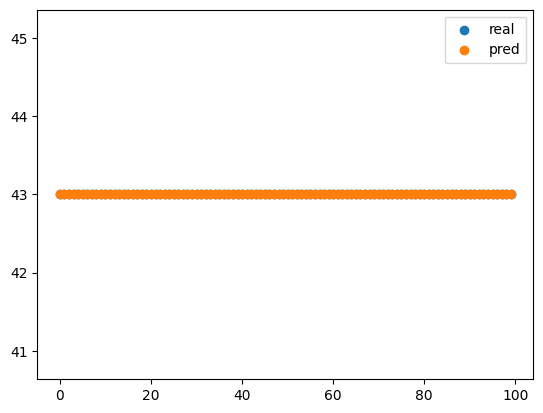

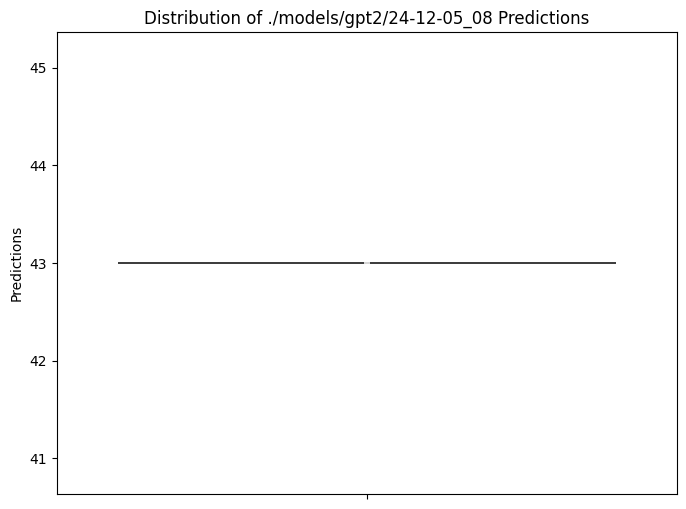

real: shape: torch.Size([100]), goal val: 42.99916458129883
min: 42.99916458129883, max: 42.99916458129883, mean: 42.99916458129883, std: 0.0


 10%|█         | 10/100 [00:03<00:30,  2.95it/s]
Both `max_new_tokens` (=1) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


r2: 0.0
mse: tensor(27971.0684)
### medium ###
max_position_embeddings
Max length: 512
Vocab size: 50257
Processing raw_data/004_banana.csv
max samples from file
samples: 513
Created 513 training examples
{'input_ids': array([26324, 12563, 26324, 12563, 26324, 12563, 26324, 12563, 26324,
       12563, 26324, 12563, 26324, 12563, 26324, 12563, 26324, 12563,
       26324, 12563, 26324, 12563, 26324, 12563, 26324, 12563, 26324,
       12563, 26324, 12563, 26324, 12563, 26324, 12563, 26324, 12563,
       26324, 12563, 26324, 12563, 26324, 12563, 26324, 12563, 26324,
       12563, 26324, 12563, 26324, 12563, 26324, 12563, 26324, 12563,
       26324, 12563, 26324, 12563, 26324, 12563, 26324, 12563, 26324,
       12563, 26324, 12563, 26324, 12563, 26324, 12563, 26324, 12563,
       26324, 12563, 26324, 12563, 26324, 12563, 26324, 12563, 26324,
       12563, 26324, 12563, 26324, 12563, 26324, 12563, 26324, 12563,
       26324, 12563, 26324, 12563, 26324, 12563, 26324, 12563, 26324,
       1256

 10%|█         | 10/100 [00:03<00:29,  3.04it/s]


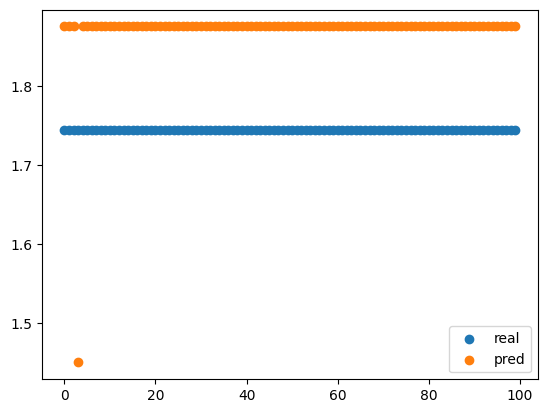

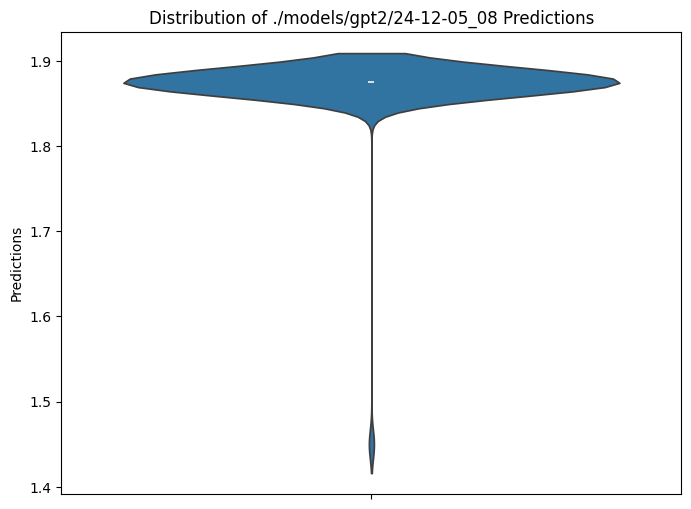

real: shape: torch.Size([100]), goal val: 1.7437090873718262
min: 1.4500000476837158, max: 1.8752024173736572, mean: 1.8709503412246704, std: 0.04252023622393608


 10%|█         | 10/100 [00:03<00:30,  2.93it/s]


r2: -2830747736472.6
mse: tensor(0.1609)
### hard ###
max_position_embeddings
Max length: 512
Vocab size: 50257
Processing raw_data/004_city-temperature.csv


Both `max_new_tokens` (=1) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


max samples from file
samples: 513
Created 513 training examples
{'input_ids': array([    0,  1621, 49564, 40461,     0,  1621, 49564, 40461,     0,
        1621, 49564, 40461,     0,  1621, 49564, 40461,     0,  1621,
       49564, 40461,     0,  1621, 49564, 40461,     0,  1621, 49564,
       40461,     0,  1621, 49564, 40461,     0,  1621, 49564, 40461,
           0,  1621, 49564, 40461,     0,  3242, 49564, 36792,     0,
        3242, 49564, 36792,     0,  3242, 49564, 36792,     0,  3242,
       49564, 36792,     0,  3242, 49564, 36792,     0,  3242, 49564,
       36792,     0,  3242, 49564, 36792,     0,  3242, 49564, 36792,
           0,  3242, 49564, 36792,     0,  3242, 49564, 36792,     0,
        4863, 49564, 36643,     0,  4863, 49564, 36643,     0,  4863,
       49564, 36643,     0,  4863, 49564, 36643,     0,  4863, 49564,
       36643,     0,  4863, 49564, 36643,     0,  4863, 49564, 36643,
           0,  4863, 49564, 36643,     0,  4863, 49564, 36643,     0,
        486

 10%|█         | 10/100 [00:03<00:29,  3.03it/s]


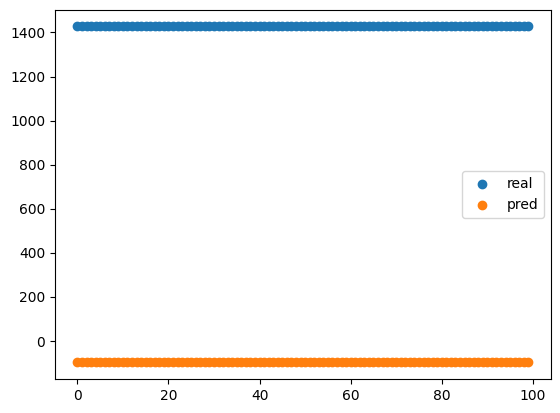

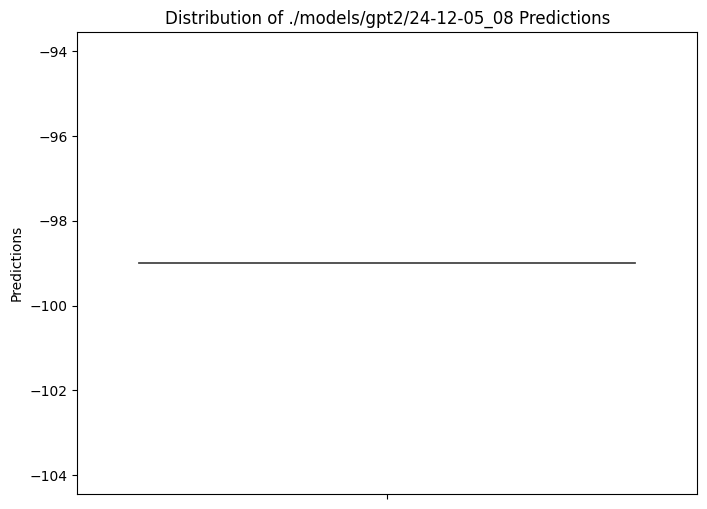

real: shape: torch.Size([100]), goal val: 1427.2449951171875
min: -99.0, max: -99.0, mean: -99.0, std: 0.0


 10%|█         | 10/100 [00:03<00:30,  2.96it/s]

r2: 0.0
mse: tensor(2140090.5000)


In [10]:
# model_path = 'Qwen/Qwen2.5-0.5B'
model_path = 'gpt2'
# get latest folder in models
files = sorted([ f"./models/{model_path}/{f}" for f in os.listdir(f"./models/{model_path}") ])
latest = max(files, key=os.path.getmtime)
# latest = f"./models/{model_path}/24-11-28_21"
# latest = "./models/Qwen/Qwen2.5-0.5B/24-11-28_21"
# latest = "./models/Qwen/Qwen2.5-0.5B/24-11-30_20"
# latest = "./models/gpt2/24-11-28_16"
# latest = "./models/gpt2/24-11-30_22"
print(latest)

# easy
print('### easy ###')
input_files = [ 'raw_data/train_001_poly.csv' ]
generated_text = test_model(latest, input_files=input_files)

# medium
print('### medium ###')
input_files = [ 'raw_data/004_banana.csv' ] # apple.csv
generated_text = test_model(latest, input_files=input_files)

# hard
print('### hard ###')
input_files = [ 'raw_data/004_city-temperature.csv' ]
generated_text = test_model(latest, input_files=input_files)

./models/gpt2/24-11-28_16
### easy ###


Both `max_new_tokens` (=1) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


max_position_embeddings
Max length: 1024
Vocab size: 50257
Processing raw_data/train_001_10-20.csv
max samples from file
Created 513 training examples
{'input_ids': array([11167, 50256, 16751, ..., 11167, 50256, 16751]), 'labels': array([50256, 16751, 50256, ..., 50256, 16751, 50256])}
torch.Size([1, 1024]) tensor([[11167, 50256, 16751,  ..., 50256, 16751, 22335]], device='mps:0')
start
real tensor([50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671, 50256, 50255, 50256,     0, 50256,  5583, 50256, 11167,
        50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671], device='mps:0')
pred tensor([50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671, 50256, 50255, 50256,     0, 50256,  5583, 50256, 11167,
        50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671], device='mps:0')
middle (1020:1050)
real tensor([50256, 16751, 50256, 2

 10%|█         | 10/100 [00:07<01:10,  1.27it/s]


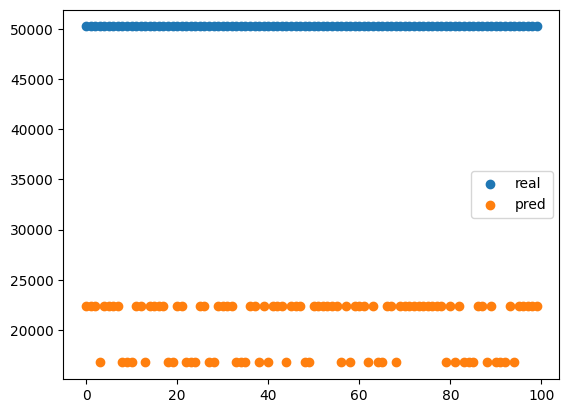

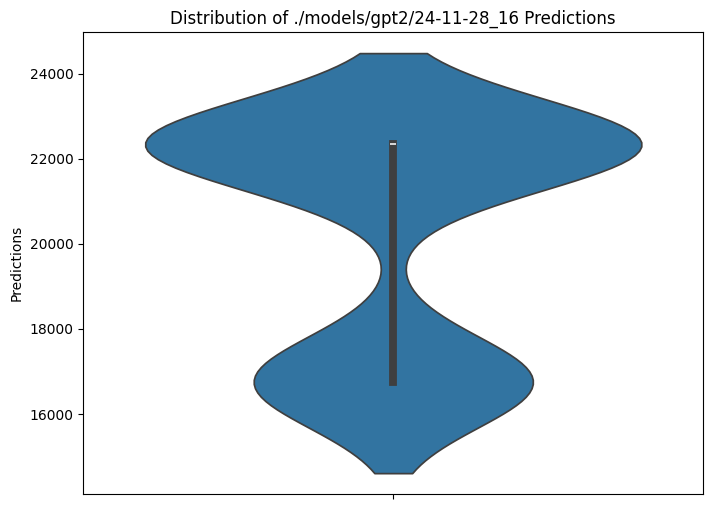

real: shape: torch.Size([100]), goal val: 50256.0
min: 16751.0, max: 22335.0, mean: 20324.759765625, std: 2693.822998046875


 10%|█         | 10/100 [00:07<01:11,  1.26it/s]
Both `max_new_tokens` (=1) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


r2: 0.0
mse: tensor(1.4664e+09)
### medium ###
max_position_embeddings
Max length: 1024
Vocab size: 50257
Processing raw_data/train_001_10-20.csv
max samples from file
Created 513 training examples
{'input_ids': array([11167, 50256, 16751, ..., 11167, 50256, 16751]), 'labels': array([50256, 16751, 50256, ..., 50256, 16751, 50256])}
torch.Size([1, 1024]) tensor([[11167, 50256, 16751,  ..., 50256, 16751, 22335]], device='mps:0')
start
real tensor([50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671, 50256, 50255, 50256,     0, 50256,  5583, 50256, 11167,
        50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671], device='mps:0')
pred tensor([50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671, 50256, 50255, 50256,     0, 50256,  5583, 50256, 11167,
        50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671], device='mps:0')
middle 

 10%|█         | 10/100 [00:07<01:10,  1.27it/s]


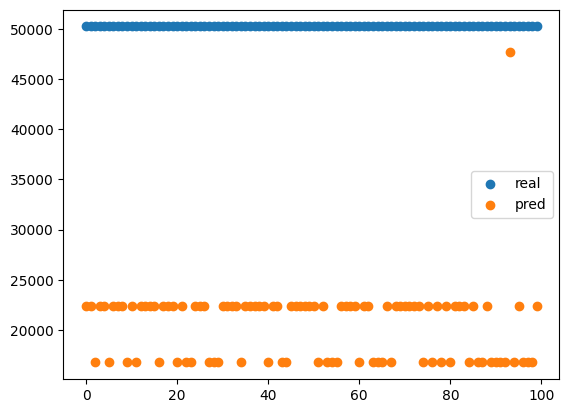

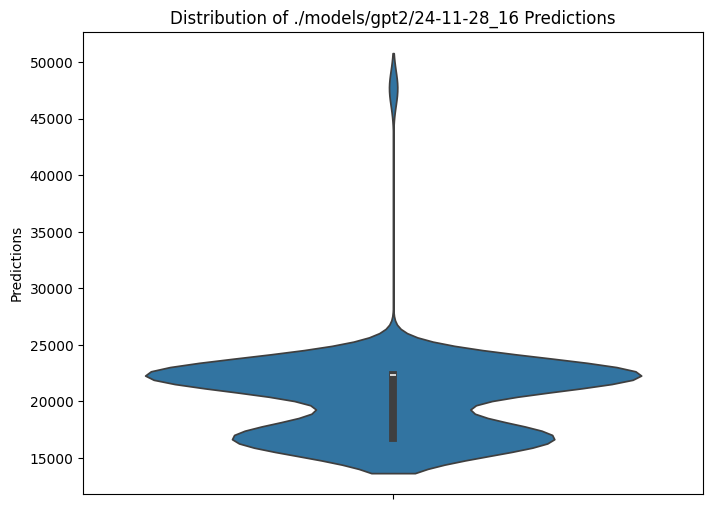

real: shape: torch.Size([100]), goal val: 50256.0
min: 16751.0, max: 47716.0, mean: 20411.05078125, std: 3879.62548828125


 10%|█         | 10/100 [00:08<01:12,  1.24it/s]
Both `max_new_tokens` (=1) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


r2: 0.0
mse: tensor(1.4882e+09)
### hard ###
max_position_embeddings
Max length: 1024
Vocab size: 50257
Processing raw_data/train_001_10-20.csv
max samples from file
Created 513 training examples
{'input_ids': array([11167, 50256, 16751, ..., 11167, 50256, 16751]), 'labels': array([50256, 16751, 50256, ..., 50256, 16751, 50256])}
torch.Size([1, 1024]) tensor([[11167, 50256, 16751,  ..., 50256, 16751, 22335]], device='mps:0')
start
real tensor([50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671, 50256, 50255, 50256,     0, 50256,  5583, 50256, 11167,
        50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671], device='mps:0')
pred tensor([50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671, 50256, 50255, 50256,     0, 50256,  5583, 50256, 11167,
        50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671], device='mps:0')
middle (1

 10%|█         | 10/100 [00:08<01:13,  1.22it/s]


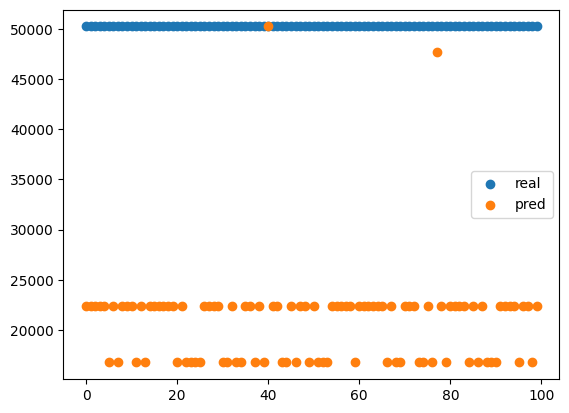

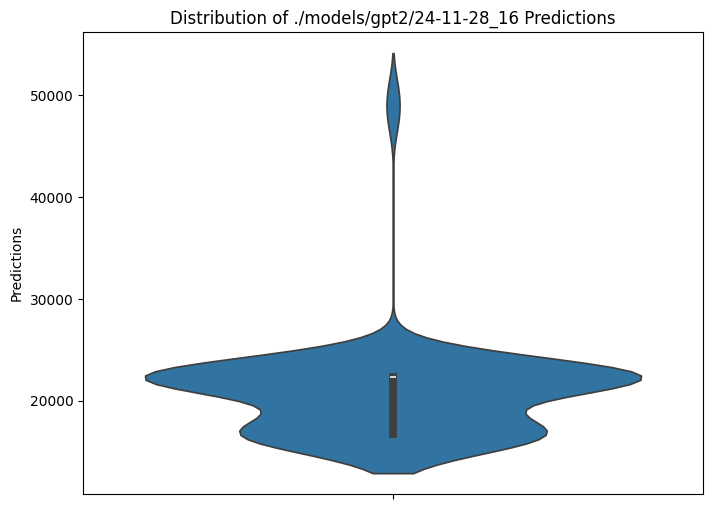

real: shape: torch.Size([100]), goal val: 50256.0
min: 16751.0, max: 50256.0, mean: 20801.939453125, std: 4864.26806640625


 10%|█         | 10/100 [00:08<01:16,  1.18it/s]

r2: 0.0
mse: tensor(1.4812e+09)


In [15]:
# latest = f"./models/{model_path}/24-11-28_21"
# latest = "./models/Qwen/Qwen2.5-0.5B/24-11-28_21"
# latest = "./models/Qwen/Qwen2.5-0.5B/24-11-30_20"
latest = "./models/gpt2/24-11-28_16"
# latest = "./models/gpt2/24-11-30_22"
print(latest)

# easy
print('### easy ###')
input_files = [ 'raw_data/train_001_10-20.csv' ]
generated_text = test_model(latest, input_files=input_files)

# medium
print('### medium ###')
input_files = [ 'raw_data/004_apple.csv' ]
generated_text = test_model(latest, input_files=input_files)

# hard
print('### hard ###')
input_files = [ 'raw_data/004_city-temperature.csv' ]
generated_text = test_model(latest, input_files=input_files)

./models/gpt2/24-11-30_22
### easy ###


Both `max_new_tokens` (=1) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


max_position_embeddings
Max length: 1024
Vocab size: 50257
Processing raw_data/train_001_10-20.csv
max samples from file
Created 513 training examples
{'input_ids': array([11167, 50256, 16751, ..., 11167, 50256, 16751]), 'labels': array([50256, 16751, 50256, ..., 50256, 16751, 50256])}
torch.Size([1, 1024]) tensor([[11167, 50256, 16751,  ..., 50256, 16751, 50256]], device='mps:0')
start
real tensor([50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671, 50256, 50255, 50256,     0, 50256,  5583, 50256, 11167,
        50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671], device='mps:0')
pred tensor([50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671, 50256, 50255, 50256,     0, 50256,  5583, 50256, 11167,
        50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671], device='mps:0')
middle (1020:1050)
real tensor([50256, 16751, 50256, 2

 10%|█         | 10/100 [00:07<01:10,  1.27it/s]


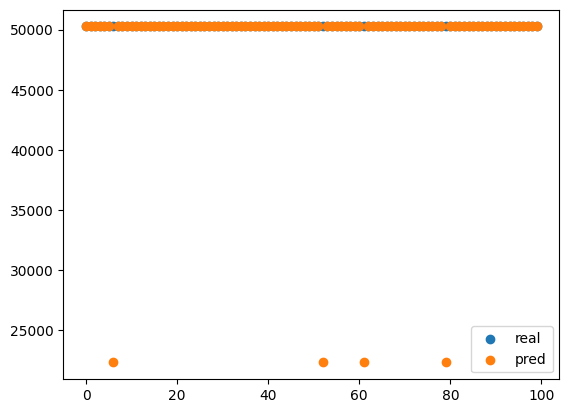

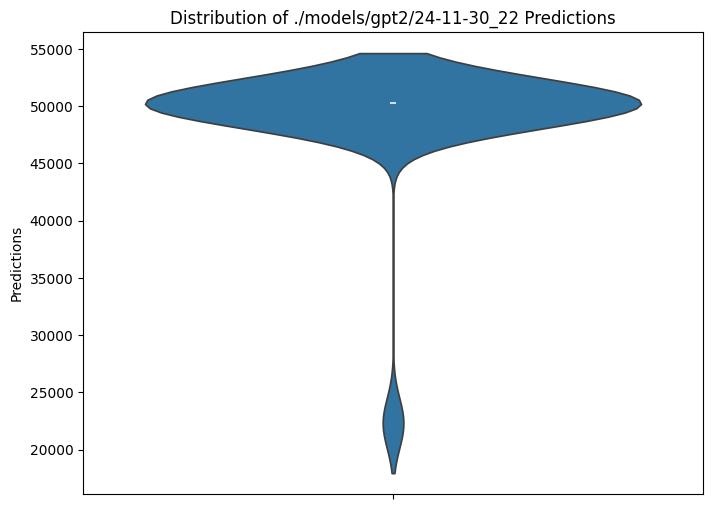

real: shape: torch.Size([100]), goal val: 50256.0
min: 22335.0, max: 50256.0, mean: 49139.16015625, std: 5498.93994140625


 10%|█         | 10/100 [00:07<01:11,  1.26it/s]
Both `max_new_tokens` (=1) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


r2: 0.0
mse: tensor(2.4851e+09)
### medium ###
max_position_embeddings
Max length: 1024
Vocab size: 50257
Processing raw_data/train_001_10-20.csv
max samples from file
Created 513 training examples
{'input_ids': array([11167, 50256, 16751, ..., 11167, 50256, 16751]), 'labels': array([50256, 16751, 50256, ..., 50256, 16751, 50256])}
torch.Size([1, 1024]) tensor([[11167, 50256, 16751,  ..., 50256, 16751, 50256]], device='mps:0')
start
real tensor([50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671, 50256, 50255, 50256,     0, 50256,  5583, 50256, 11167,
        50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671], device='mps:0')
pred tensor([50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671, 50256, 50255, 50256,     0, 50256,  5583, 50256, 11167,
        50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671], device='mps:0')
middle 

 10%|█         | 10/100 [00:07<01:11,  1.27it/s]


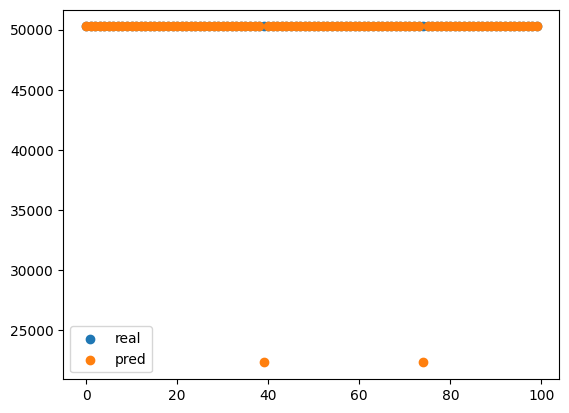

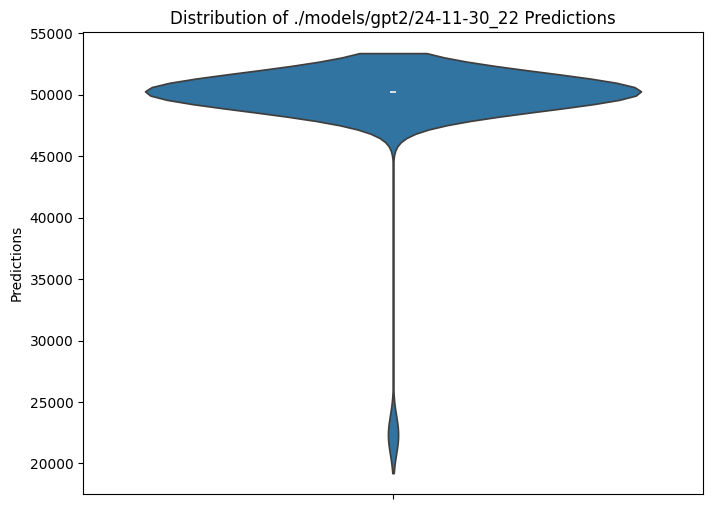

real: shape: torch.Size([100]), goal val: 50256.0
min: 22335.0, max: 50256.0, mean: 49697.578125, std: 3928.632568359375


 10%|█         | 10/100 [00:08<01:12,  1.23it/s]
Both `max_new_tokens` (=1) and `max_length`(=1024) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


r2: 0.0
mse: tensor(2.5053e+09)
### hard ###
max_position_embeddings
Max length: 1024
Vocab size: 50257
Processing raw_data/train_001_10-20.csv
max samples from file
Created 513 training examples
{'input_ids': array([11167, 50256, 16751, ..., 11167, 50256, 16751]), 'labels': array([50256, 16751, 50256, ..., 50256, 16751, 50256])}
torch.Size([1, 1024]) tensor([[11167, 50256, 16751,  ..., 50256, 16751, 50256]], device='mps:0')
start
real tensor([50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671, 50256, 50255, 50256,     0, 50256,  5583, 50256, 11167,
        50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671], device='mps:0')
pred tensor([50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671, 50256, 50255, 50256,     0, 50256,  5583, 50256, 11167,
        50256, 16751, 50256, 22335, 50256, 27919, 50256, 33503, 50256, 39087,
        50256, 44671], device='mps:0')
middle (1

 10%|█         | 10/100 [00:07<01:11,  1.26it/s]


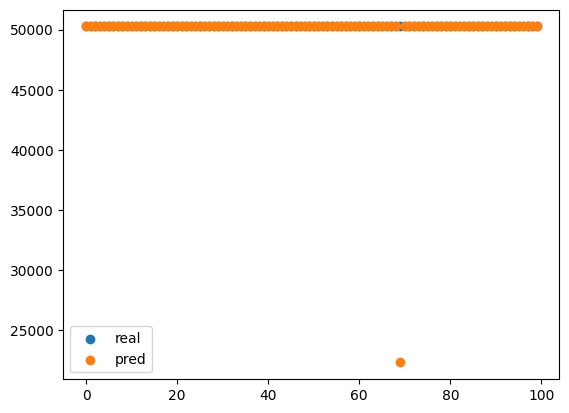

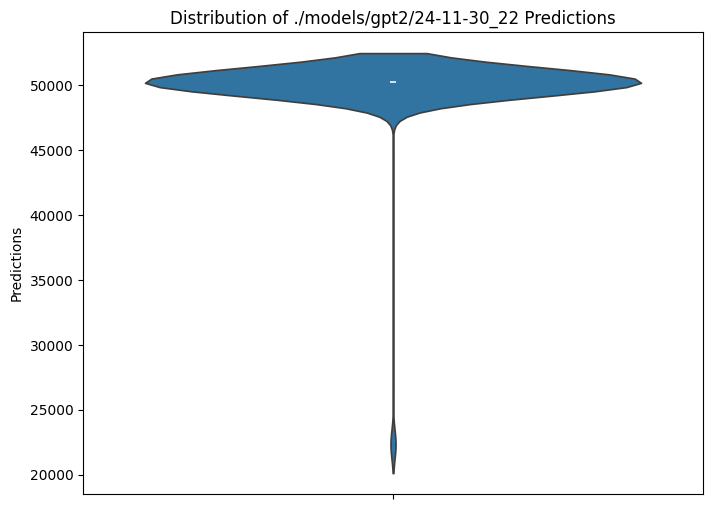

real: shape: torch.Size([100]), goal val: 50256.0
min: 22335.0, max: 50256.0, mean: 49976.78125, std: 2792.098876953125


 10%|█         | 10/100 [00:08<01:13,  1.22it/s]

r2: 0.0
mse: tensor(2.5256e+09)


In [17]:
# latest = f"./models/{model_path}/24-11-28_21"
# latest = "./models/Qwen/Qwen2.5-0.5B/24-11-28_21"
# latest = "./models/Qwen/Qwen2.5-0.5B/24-11-30_20"
# latest = "./models/gpt2/24-11-28_16"
latest = "./models/gpt2/24-11-30_22"
print(latest)

# easy
print('### easy ###')
input_files = [ 'raw_data/train_001_10-20.csv' ]
generated_text = test_model(latest, input_files=input_files)

# medium
print('### medium ###')
input_files = [ 'raw_data/004_apple.csv' ]
generated_text = test_model(latest, input_files=input_files)

# hard
print('### hard ###')
input_files = [ 'raw_data/004_city-temperature.csv' ]
generated_text = test_model(latest, input_files=input_files)

In [ ]:
# https://www.kaggle.com/datasets/stefancomanita/hourly-electricity-consumption-and-production
# https://www.kaggle.com/datasets/vislupus/vegetable-and-fruit-prices
# https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities

In [ ]:
# gpt: 24-11-28_16: bad
# gpt: 24-11-30_22: good
# qwen: 24-11-30_20: good
# qwen: 24-12-01_11: meh (2k window)